# Create Recommender Engine

*What is a recommender engine?*

A recommender engine is an information filtering system that predicts a user's preferences for a set of items (such as products, movies, or music) based on their previous interactions with those items or similar items, and provides personalized recommendations for new items.

This recommender engine takes in a *seed track* and outputs track recommendations based on *similarity measures*

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

## 1. Read the recommendation pool

In [2]:
# read data
rec_pool_df = pd.read_csv("../data/mainstay_opmd_4t_tracks_rec_pool.csv")
rec_pool_df

,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,valence,tempo,genres,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_indie_proba,genre_pop_proba,genre_rock_proba,genre_soul_proba
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.3760,9.0,-6.100,...,0.2800,124.570,"['opm', 'pinoy rock']",2,rock,0.356612,0.174906,0.299166,0.356612,0.169316
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.2620,11.0,-15.073,...,0.2650,84.007,"['opm', 'pinoy rock']",3,soul,0.533254,0.154789,0.059934,0.252022,0.533254
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.3220,6.0,-13.200,...,0.5110,155.982,"['opm', 'pinoy indie', 'pinoy rock', 'pop rock']",3,soul,0.374060,0.307678,0.029233,0.289029,0.374060
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.1250,7.0,-14.847,...,0.1080,114.694,['opm'],0,indie,0.718502,0.718502,0.061828,0.043020,0.176650
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.2810,7.0,-8.813,...,0.3060,91.961,"['opm', 'vispop']",3,soul,0.513464,0.127611,0.230245,0.128679,0.513464
5,01YEqVPCm0vqRLA9w43bic,Hanggang Kailan,Michael Pangilinan,363,1t2caVgyabZrVDAlmMGraV,230453,0.404,0.1740,9.0,-10.192,...,0.3240,87.636,['opm'],3,soul,0.556001,0.234835,0.102176,0.106988,0.556001
6,2PcbtMoqOlGSzOfyJlkB06,Your Love - Dolce Amore Teleserye Theme,Juris,362,4BNWanhw4AjSXjBm9L1Jzy,250803,0.520,0.3090,2.0,-12.039,...,0.1770,150.098,['opm'],3,soul,0.405120,0.176200,0.176907,0.241773,0.405120
7,29xs643Q96uQLD8f7SxYYw,Sa'yo,Silent Sanctuary,362,4nGp682WMiKS4X217kPw8C,253360,0.567,0.0896,5.0,-12.944,...,0.3670,79.002,"['opm', 'pinoy rock']",3,soul,0.673096,0.155927,0.046581,0.124396,0.673096
8,7sW3f7PqDV7BQ7qqeVBJIA,Migraine,Moonstar88,363,2kZThDGZcHl4klYYFk0v8n,267560,0.662,0.5460,2.0,-5.868,...,0.1960,115.053,"['opm', 'pinoy rock', 'pop rock']",1,pop,0.408662,0.158459,0.408662,0.344080,0.088799
9,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,332,6aiCKnIN68hohzU3ZzNq48,255608,0.389,0.2730,6.0,-7.697,...,0.1760,134.124,['opm'],3,soul,0.345732,0.200930,0.274635,0.178704,0.345732


In [3]:
rec_pool_df.shape

(56, 25)

## 2. Input Seed Track


The **seed track** is the track that will serve as input to the recommender engine. The recommender engine will attempt to generate recommendations from the pool based on their similarity to the seed track.

>Q: Pick a track of choice and use this as seed track

In [4]:
seed_track_data = rec_pool_df[rec_pool_df['track_name']=="Uhaw (Tayong Lahat)"].iloc[0]
seed_track_data#[feature_cols]

track_id                 47OFMuRu5lzJHRbtEXPBbs
track_name                  Uhaw (Tayong Lahat)
artist_name                               Dilaw
streams                                   90213
artist_id                6Dp4LInLyMVA2qhRqQ6AGL
duration                                 241185
danceability                              0.635
energy                                    0.724
key                                         5.0
loudness                                 -6.662
mode                                        1.0
speechiness                              0.0716
acousticness                               0.28
instrumentalness                       0.000004
liveness                                  0.105
valence                                   0.316
tempo                                   135.927
genres                                      opm
predicted_genre_id                            1
predicted_genre                             pop
predicted_genre_proba                  0

## 3. Explore Similarity Measures

We will use 3 similarity measures for our recommender engine. These are usually expressed as a distance metric. The smaller these quantities are, the closer the two points are.

**Euclidean distance**- It is the straight-line distance between two points in Euclidean space. In other words, it is the length of the shortest path between two points in a straight line. It is calculated as the square root of the sum of the squared differences between each corresponding dimension of the two points.

**Manhattan distance**- It is also known as taxicab distance or L1 distance. It measures the distance between two points by summing the absolute differences between each corresponding dimension of the two points. It represents the distance between two points as if a person were walking on the streets of Manhattan, where the shortest path between two points is always a right-angled path.

**Cosine distance**- It measures the cosine of the angle between two vectors in a high-dimensional space. It calculates the similarity between two vectors rather than the distance. It is often used to compare the similarity between text documents or to determine the similarity between two images.

In [5]:
# Audio feature cols
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
# Genre probability cols
genre_proba_cols = [col for col in rec_pool_df.columns if col.startswith('genre_')]

Compute distances

In [6]:
def get_distances(x,y):
    euclidean_dist =  euclidean_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    manhattan_dist =  manhattan_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    cosine_dist = 1 - cosine_similarity(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    return [euclidean_dist,manhattan_dist,cosine_dist]

In [7]:
rec_pool_df['all_distances_features'] = rec_pool_df.apply(lambda x: get_distances(x[feature_cols],\
                                                                           seed_track_data[feature_cols]), axis=1)

In [8]:
dist_feature_cols = ['euclidean_dist_features','manhattan_dist_features', 'cosine_dist_features']
rec_pool_df[dist_feature_cols] = rec_pool_df['all_distances_features'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,predicted_genre,predicted_genre_proba,genre_indie_proba,genre_pop_proba,genre_rock_proba,genre_soul_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.376,9.0,-6.100,...,rock,0.356612,0.174906,0.299166,0.356612,0.169316,"[11.379501920998907, 12.602504, 4.717610171289...",11.379502,12.602504,0.000005
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.262,11.0,-15.073,...,soul,0.533254,0.154789,0.059934,0.252022,0.533254,"[52.59953714596749, 61.22270399999999, 0.00826...",52.599537,61.222704,0.008269
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.322,6.0,-13.200,...,soul,0.374060,0.307678,0.029233,0.289029,0.374060,"[21.098971179259312, 27.444396000000005, 0.000...",21.098971,27.444396,0.000635
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.125,7.0,-14.847,...,indie,0.718502,0.718502,0.061828,0.043020,0.176650,"[22.774539487989653, 31.30730065999999, 0.0032...",22.774539,31.307301,0.003206
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.281,7.0,-8.813,...,soul,0.513464,0.127611,0.230245,0.128679,0.513464,"[44.02447238752569, 47.253004, 0.0011131005633...",44.024472,47.253004,0.001113


View histograms of the 3 similarity measures

array([[<Axes: title={'center': 'euclidean_dist_features'}>,
        <Axes: title={'center': 'manhattan_dist_features'}>],
       [<Axes: title={'center': 'cosine_dist_features'}>, <Axes: >]],
      dtype=object)

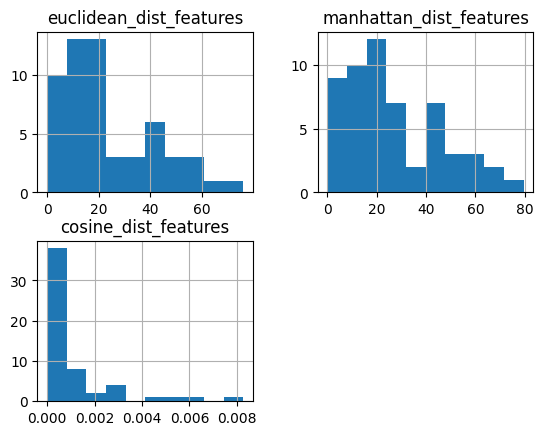

In [9]:
rec_pool_df[dist_feature_cols].hist()

## 4. Build engine and generate recommendations

 - We will output recommended tracks based on the seed track using the following recommender engine builds

    - Build 1. Audio features only
    - Build 2. Audio features and with same predicted genre
    - Build 3. Predicted genre probabilities only
    - Build 4. Audio features and predicted genre probabilities

##### 4.1. Build 1 - Use audio features only
4.1.1. Euclidean distance

In [10]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','euclidean_dist_features','predicted_genre']]

,track_id,track_name,artist_name,euclidean_dist_features,predicted_genre
22,2tzAN1L07SNwnOdgOEeuQr,Pauwi Nako,PDL,1.078489,rock
16,5nMKJJ5Rl6X1yn58aVeICO,Bulong,December Avenue,1.613060,rock
32,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,1.689660,pop
9,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,2.188052,soul
17,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,2.824073,pop
14,4u8RkgV6P4TLi89SmlUtv8,Mundo,IV Of Spades,4.690509,soul
21,5NXdUJ3Z2jhlp2u1cj6f7m,Balang Araw - Single Version,I Belong to the Zoo,4.778634,rock
26,4rG3h1QwgjSSWz8EIjCFrm,Araw-Araw,Ben&Ben,5.289635,rock
34,55RMhrPQYA6vLu5YMgXxFD,Binibini,Zack Tabudlo,7.254534,rock
28,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,8.144794,pop


4.1.2. Manhattan distance

In [11]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','manhattan_dist_features','predicted_genre']]

,track_id,track_name,artist_name,manhattan_dist_features,predicted_genre
22,2tzAN1L07SNwnOdgOEeuQr,Pauwi Nako,PDL,1.829704,rock
32,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,2.246304,pop
16,5nMKJJ5Rl6X1yn58aVeICO,Bulong,December Avenue,2.729204,rock
9,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,4.147404,soul
17,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,4.761804,pop
14,4u8RkgV6P4TLi89SmlUtv8,Mundo,IV Of Spades,7.069505,soul
21,5NXdUJ3Z2jhlp2u1cj6f7m,Balang Araw - Single Version,I Belong to the Zoo,7.275804,rock
26,4rG3h1QwgjSSWz8EIjCFrm,Araw-Araw,Ben&Ben,7.729104,rock
28,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,10.199604,pop
34,55RMhrPQYA6vLu5YMgXxFD,Binibini,Zack Tabudlo,11.095702,rock


4.1.3. Cosine distance

In [12]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
32,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,0.000003,pop
8,7sW3f7PqDV7BQ7qqeVBJIA,Migraine,Moonstar88,0.000003,pop
35,63bmIgH9sS6sX5Sc7MetGq,Habang Buhay,Zack Tabudlo,0.000004,rock
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,0.000005,rock
48,2e7iqtA42EPXTtiiAlblC1,"Babalik Sa'yo (from ""2 Good 2 Be True"")",Moira Dela Torre,0.000005,soul
22,2tzAN1L07SNwnOdgOEeuQr,Pauwi Nako,PDL,0.000007,rock
39,3PgjBOoA5OytNGkglObpOd,Sa Susunod na Habang Buhay,Ben&Ben,0.000011,rock
31,2v5VIWMjZxeiG52KckiXxS,Ikaw Lamang,Silent Sanctuary,0.000019,pop
28,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,0.000028,pop
16,5nMKJJ5Rl6X1yn58aVeICO,Bulong,December Avenue,0.000038,rock


##### 4.2. Build 2 - Audio features and with same predicted genre

In [13]:
rec_pool_df.columns

Index(['track_id', 'track_name', 'artist_name', 'streams', 'artist_id',
       'duration', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genres', 'predicted_genre_id', 'predicted_genre',
       'predicted_genre_proba', 'genre_indie_proba', 'genre_pop_proba',
       'genre_rock_proba', 'genre_soul_proba', 'all_distances_features',
       'euclidean_dist_features', 'manhattan_dist_features',
       'cosine_dist_features'],
      dtype='object')

In [14]:
recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [rec_pool_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

C:\Users\Justin\AppData\Local\Temp\ipykernel_16236\2027584644.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
32,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,0.000003,pop
8,7sW3f7PqDV7BQ7qqeVBJIA,Migraine,Moonstar88,0.000003,pop
31,2v5VIWMjZxeiG52KckiXxS,Ikaw Lamang,Silent Sanctuary,0.000019,pop
28,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,0.000028,pop
53,0uZFcsx96wzbixsULmrg8o,Pasilyo,SunKissed Lola,0.000053,pop
17,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,0.000096,pop
42,4IeuTj1pEHuL9vJSiEqEfR,Ligaya,mrld,0.000101,pop
11,4ai7c2BUjNpElhZdZDH7qF,Dahil Sa'Yo,Inigo Pascual,0.000239,pop


##### 4.3. Build 3 - Predicted genre probabilities

In [15]:
rec_pool_df['all_distances_proba'] = rec_pool_df.apply(lambda x: get_distances(x[genre_proba_cols],\
                                                                           seed_track_data[genre_proba_cols]), axis=1)

In [16]:
dist_proba_cols = ['euclidean_dist_proba','manhattan_dist_proba', 'cosine_dist_proba']
rec_pool_df[dist_proba_cols] = rec_pool_df['all_distances_proba'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,genre_rock_proba,genre_soul_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.376,9.0,-6.100,...,0.356612,0.169316,"[11.379501920998907, 12.602504, 4.717610171289...",11.379502,12.602504,0.000005,"[0.12037220052279163, 0.21277795152630094, 0.0...",0.120372,0.212778,0.026489
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.262,11.0,-15.073,...,0.252022,0.533254,"[52.59953714596749, 61.22270399999999, 0.00826...",52.599537,61.222704,0.008269,"[0.40644598317223296, 0.6557575197128322, 0.24...",0.406446,0.655758,0.248430
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.322,6.0,-13.200,...,0.289029,0.374060,"[21.098971179259312, 27.444396000000005, 0.000...",21.098971,27.444396,0.000635,"[0.31091050778384066, 0.5053600205464595, 0.16...",0.310911,0.505360,0.163381
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.125,7.0,-14.847,...,0.043020,0.176650,"[22.774539487989653, 31.30730065999999, 0.0032...",22.774539,31.307301,0.003206,"[0.5688795417077473, 0.9465322586981322, 0.355...",0.568880,0.946532,0.355073
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.281,7.0,-8.813,...,0.128679,0.513464,"[44.02447238752569, 47.253004, 0.0011131005633...",44.024472,47.253004,0.001113,"[0.36150805233817235, 0.6161770226330643, 0.20...",0.361508,0.616177,0.206629


In [17]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_proba')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_proba','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_proba,predicted_genre
34,55RMhrPQYA6vLu5YMgXxFD,Binibini,Zack Tabudlo,0.024212,rock
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,0.026489,rock
28,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,0.033828,pop
47,4mc3rUoMwwiNTHA4al9nNd,Fallen,Lola Amour,0.042197,rock
31,2v5VIWMjZxeiG52KckiXxS,Ikaw Lamang,Silent Sanctuary,0.047001,pop
39,3PgjBOoA5OytNGkglObpOd,Sa Susunod na Habang Buhay,Ben&Ben,0.048095,rock
22,2tzAN1L07SNwnOdgOEeuQr,Pauwi Nako,PDL,0.049395,rock
18,1X4l4i472kW5ofFP8Xo0x0,Sana - Single Version,I Belong to the Zoo,0.051366,rock
9,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,0.056513,soul
53,0uZFcsx96wzbixsULmrg8o,Pasilyo,SunKissed Lola,0.064392,pop


##### 4.4. Build 4 - Audio features and predicted genre probabilities

In [18]:
cols = feature_cols + genre_proba_cols
rec_pool_df['all_distances_all'] = rec_pool_df.apply(lambda x: get_distances(x[cols],\
                                                                           seed_track_data[cols]), axis=1)

In [19]:
dist_all_cols = ['euclidean_dist_all','manhattan_dist_all', 'cosine_dist_all']
rec_pool_df[dist_all_cols] = rec_pool_df['all_distances_all'].apply(pd.Series)
rec_pool_df.head()

,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba,all_distances_all,euclidean_dist_all,manhattan_dist_all,cosine_dist_all
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.376,9.0,-6.100,...,12.602504,0.000005,"[0.12037220052279163, 0.21277795152630094, 0.0...",0.120372,0.212778,0.026489,"[11.380138550855916, 12.815281951526302, 5.261...",11.380139,12.815282,0.000005
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.262,11.0,-15.073,...,61.222704,0.008269,"[0.40644598317223296, 0.6557575197128322, 0.24...",0.406446,0.655758,0.248430,"[52.601107462744984, 61.87846151971283, 0.0082...",52.601107,61.878462,0.008282
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.322,6.0,-13.200,...,27.444396,0.000635,"[0.31091050778384066, 0.5053600205464595, 0.16...",0.310911,0.505360,0.163381,"[21.101261814571046, 27.949756020546467, 0.000...",21.101262,27.949756,0.000637
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.125,7.0,-14.847,...,31.307301,0.003206,"[0.5688795417077473, 0.9465322586981322, 0.355...",0.568880,0.946532,0.355073,"[22.78164333016754, 32.25383291869812, 0.00321...",22.781643,32.253833,0.003218
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.281,7.0,-8.813,...,47.253004,0.001113,"[0.36150805233817235, 0.6161770226330643, 0.20...",0.361508,0.616177,0.206629,"[44.02595662869706, 47.869181022633065, 0.0011...",44.025957,47.869181,0.001122


In [20]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_name,artist_name,cosine_dist_all,predicted_genre
32,The Day You Said Goodnight,Hale,0.000005,pop
8,Migraine,Moonstar88,0.000005,pop
0,Sila,SUD,0.000005,rock
35,Habang Buhay,Zack Tabudlo,0.000007,rock
48,"Babalik Sa'yo (from ""2 Good 2 Be True"")",Moira Dela Torre,0.000007,soul
22,Pauwi Nako,PDL,0.000008,rock
39,Sa Susunod na Habang Buhay,Ben&Ben,0.000012,rock
31,Ikaw Lamang,Silent Sanctuary,0.000020,pop
28,Imahe,Magnus Haven,0.000028,pop
16,Bulong,December Avenue,0.000040,rock


In [21]:
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_all,predicted_genre
32,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,0.000005,pop
8,7sW3f7PqDV7BQ7qqeVBJIA,Migraine,Moonstar88,0.000005,pop
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,0.000005,rock
35,63bmIgH9sS6sX5Sc7MetGq,Habang Buhay,Zack Tabudlo,0.000007,rock
48,2e7iqtA42EPXTtiiAlblC1,"Babalik Sa'yo (from ""2 Good 2 Be True"")",Moira Dela Torre,0.000007,soul
22,2tzAN1L07SNwnOdgOEeuQr,Pauwi Nako,PDL,0.000008,rock
39,3PgjBOoA5OytNGkglObpOd,Sa Susunod na Habang Buhay,Ben&Ben,0.000012,rock
31,2v5VIWMjZxeiG52KckiXxS,Ikaw Lamang,Silent Sanctuary,0.000020,pop
28,65sEZZaxTjLMD8vNgPoMz5,Imahe,Magnus Haven,0.000028,pop
16,5nMKJJ5Rl6X1yn58aVeICO,Bulong,December Avenue,0.000040,rock


## 5. Output recommendations
Pick an approach, get the track_id list, and plug in next notebook to deploy as a playlist in Spotify

In [22]:
recommendation_df['track_id'].values

array(['0HZ3OUVrGHxttD2EuHqRm3', '7sW3f7PqDV7BQ7qqeVBJIA',
       '2IMODbij0lZ5CuAjZi0IDE', '63bmIgH9sS6sX5Sc7MetGq',
       '2e7iqtA42EPXTtiiAlblC1', '2tzAN1L07SNwnOdgOEeuQr',
       '3PgjBOoA5OytNGkglObpOd', '2v5VIWMjZxeiG52KckiXxS',
       '65sEZZaxTjLMD8vNgPoMz5', '5nMKJJ5Rl6X1yn58aVeICO'], dtype=object)